In [1]:
#All imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor 

In [2]:
#readind the file into 'dataset' and describing it
dataset = pd.read_csv('airfoil_self_noise.dat', sep='\t', names= ["Frequency", "AngleOfAttack", "ChordLength", "freeStreamVelocity","SuctionSideDisplacementThickness","SoundPressure"])
dataset.describe()

,Frequency,AngleOfAttack,ChordLength,freeStreamVelocity,SuctionSideDisplacementThickness,SoundPressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Text(0.5, 1.0, 'Frequency')

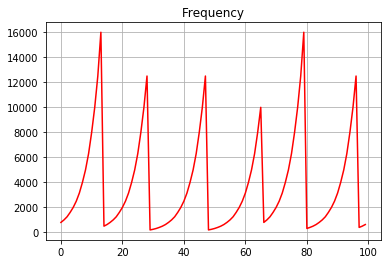

In [3]:
#Plotting each Frequency with grid to compare with 'SoundPressure'
plt.plot(dataset['Frequency'].values[0:100],color="red")
plt.grid()
plt.title('Frequency')

Text(0.5, 1.0, 'SoundPressure')

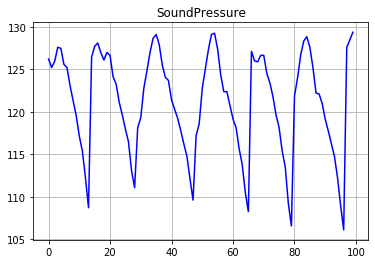

In [4]:
#Plotting each soundPressure respectively
plt.plot(dataset['SoundPressure'].values[0:100], color='blue')
plt.grid()
plt.title('SoundPressure')

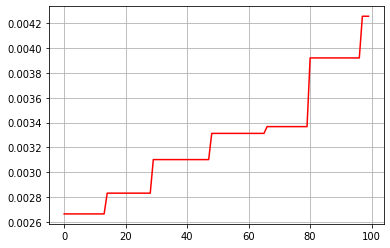

In [5]:
##Plotting each 'SuctionSideDisplacementThickness' with grid to compare with 'SoundPressure'
plt.plot(dataset['SuctionSideDisplacementThickness'].values[0:100],color='red')
plt.grid()

Text(0.5, 1.0, 'Frequency')

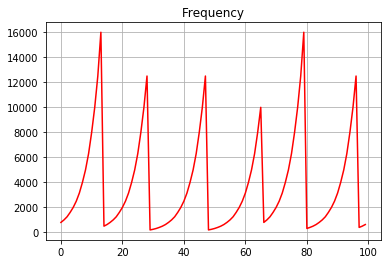

In [6]:
#Plotting each Frequency with grid to compare with 'SoundPressure'
plt.plot(dataset['Frequency'].values[0:100],color="red")
plt.grid()
plt.title('Frequency')

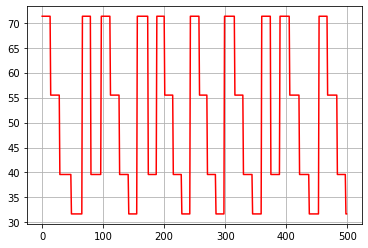

In [7]:
#Plotting each "freeStreamVelocity" with grid to compare with 'SoundPressure'
plt.plot(dataset['freeStreamVelocity'].values[0:500], color='red') ##Discard
plt.grid()

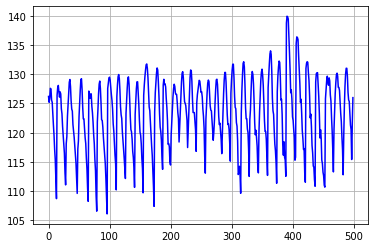

In [8]:
#Plotting each soundPressure respectively
plt.plot(dataset['SoundPressure'].values[0:500], color='blue')
plt.grid()

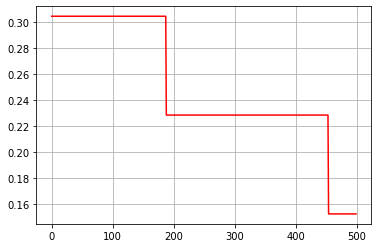

In [9]:
plt.plot(dataset['ChordLength'].values[0:500], color='red') #discard
plt.grid()

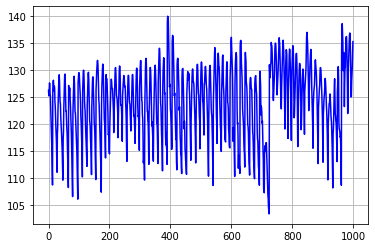

In [10]:
plt.plot(dataset['SoundPressure'].values[0:1000], color='blue')
plt.grid()

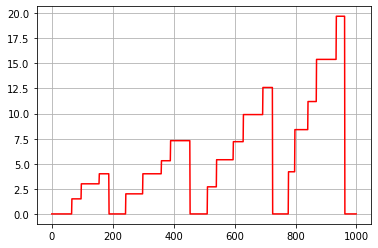

In [11]:
plt.plot(dataset['AngleOfAttack'].values[0:1000], color='red')
plt.grid()

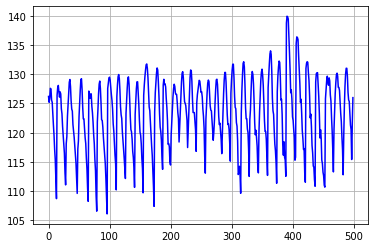

In [12]:
plt.plot(dataset['SoundPressure'].values[0:500], color='blue')
plt.grid()

In [13]:
# from sklearn.preprocessing import StandardScaler
# X= dataset.iloc[:,0:5].values
# y= dataset.iloc[:,5].values
# ss = StandardScaler()

In [14]:
# X_scale=ss.fit_transform(X)
# dataset1=pd.DataFrame(X_scale,columns= ["Frequency", "AngleOfAttack", "ChordLength", "freeStreamVelocity","SuctionSideDisplacementThickness"])
# # dataset.boxplot(column= ["Frequency", "AngleOfAttack", "ChordLength", "freeStreamVelocity","SuctionSideDisplacementThickness"])

In [15]:
# plt.plot(dataset1['Frequency'].values[:100])
# plt.plot(dataset['AngleOfAttack'].values[0:100], color='red')
# # plt.plot(dataset['SoundPressure'].values[0:100], color='blue')

In [16]:
#Splitting data into train and test
#only suitable columns are taken according to insights, further info in documentation
X= dataset.iloc[:,[0,1,4]].values
y= dataset.iloc[:,5].values
X_train, X_test, y_train, y_test= tts(X,y,test_size=0.25)

In [17]:
#DecisionTreeRegressor() implementaion
regressor = DecisionTreeRegressor() #object of DecisionTreeRegressor()
regressor.fit(X_train,y_train) #Fitting x_train,y_train in model
regressor.score(X_test,y_test) # generationg score

0.8521961093958581

Text(0.5, 1.0, 'Decesionn tree graph visualization')

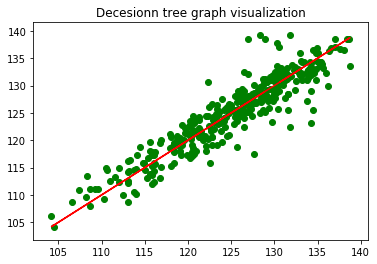

In [18]:
#Visualising y_test and Predicted value
plt.plot(y_test,y_test,color="red")# original data
plt.scatter(y_test,regressor.predict(X_test),color="g")# Predicted  data
plt.title('Decesionn tree graph visualization')

In [24]:
##Polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) #creating PolynomialFeatures with degree 3
x_poly=poly.fit_transform(X_train) # Adding the higher degree terms of each attribute in x_train into x_poly along with 'b0' term
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,400.0,22.2,0.021418,160000.0,8880.0,8.567120,492.84,0.475475,0.000459,6.400000e+07,3552000.0,3426.848000,197136.0,190.190064,0.183489,10941.048,10.555549,0.010184,9.824819e-06
1,1.0,250.0,5.3,0.006143,62500.0,1325.0,1.535823,28.09,0.032559,0.000038,1.562500e+07,331250.0,383.955625,7022.5,8.139859,0.009435,148.877,0.172565,0.000200,2.318478e-07
2,1.0,1600.0,4.0,0.005091,2560000.0,6400.0,8.145088,16.00,0.020363,0.000026,4.096000e+09,10240000.0,13032.140800,25600.0,32.580352,0.041464,64.000,0.081451,0.000104,1.319251e-07
3,1.0,1000.0,0.0,0.001933,1000000.0,0.0,1.932870,0.00,0.000000,0.000004,1.000000e+09,0.0,1932.870000,0.0,0.000000,0.003736,0.000,0.000000,0.000000,7.221176e-09
4,1.0,250.0,7.3,0.012348,62500.0,1825.0,3.087025,53.29,0.090141,0.000152,1.562500e+07,456250.0,771.756250,13322.5,22.535283,0.038119,389.017,0.658030,0.001113,1.882784e-06


In [25]:
#Comparing X_train with X_poly, notice the 0th colmn, it is the 'b0' term
pd.DataFrame(X_train).head() 


,0,1,2
0,400.0,22.2,0.021418
1,250.0,5.3,0.006143
2,1600.0,4.0,0.005091
3,1000.0,0.0,0.001933
4,250.0,7.3,0.012348


In [26]:
regg.score(poly.fit_transform(X_test),y_test) #Score

NameError: name 'regg' is not defined

Text(0.5, 1.0, 'Polynomial Regression')

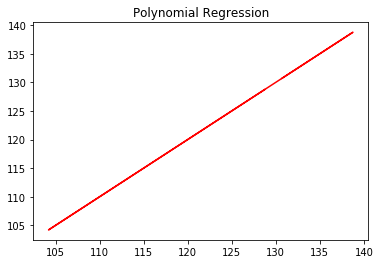

In [27]:
#Visulaising y_test and Predicted values
plt.plot(y_test,y_test,c='r')
# plt.scatter(y_test,regg.predict(poly.fit_transform(X_test)),c='g') #passing y_test and Predicted value,
                                                                    #notice instead of X_test polynomial term of X_test is to be passes
plt.title('Polynomial Regression')

In [22]:
##RandomForest
from sklearn.ensemble import RandomForestRegressor

r_regg= RandomForestRegressor()
r_regg.fit(X_train,y_train) #model fitting
r_regg.score(X_train,y_train) #score

c:\users\chandano\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9811670315545429

Text(0.5, 1.0, 'Random Forest Regression')

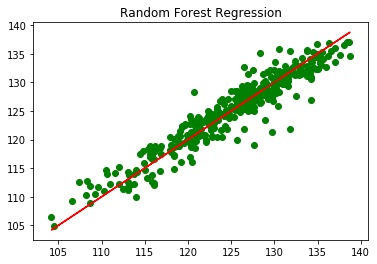

In [28]:
#Visulaising y_test and Predicted values
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,r_regg.predict(X_test),c='g')
plt.title('Random Forest Regression')

In [32]:
r_regg.score(X_test,y_test)

0.9035835306354414

In [ ]:
##LinearRegression

In [29]:
lin_regg = LinearRegression()
lin_regg.fit(X_train,y_train) #model fitting
lin_regg.score(X_train,y_train) #score

0.32767868996978433

Text(0.5, 1.0, 'Linear Regression')

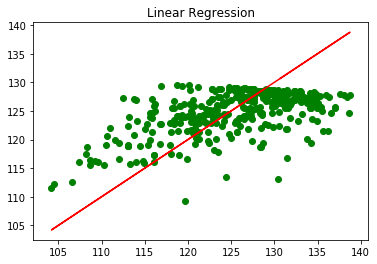

In [30]:
#Visulaising y_test and Predicted values
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,lin_regg.predict(X_test),c='g')
plt.title('Linear Regression')